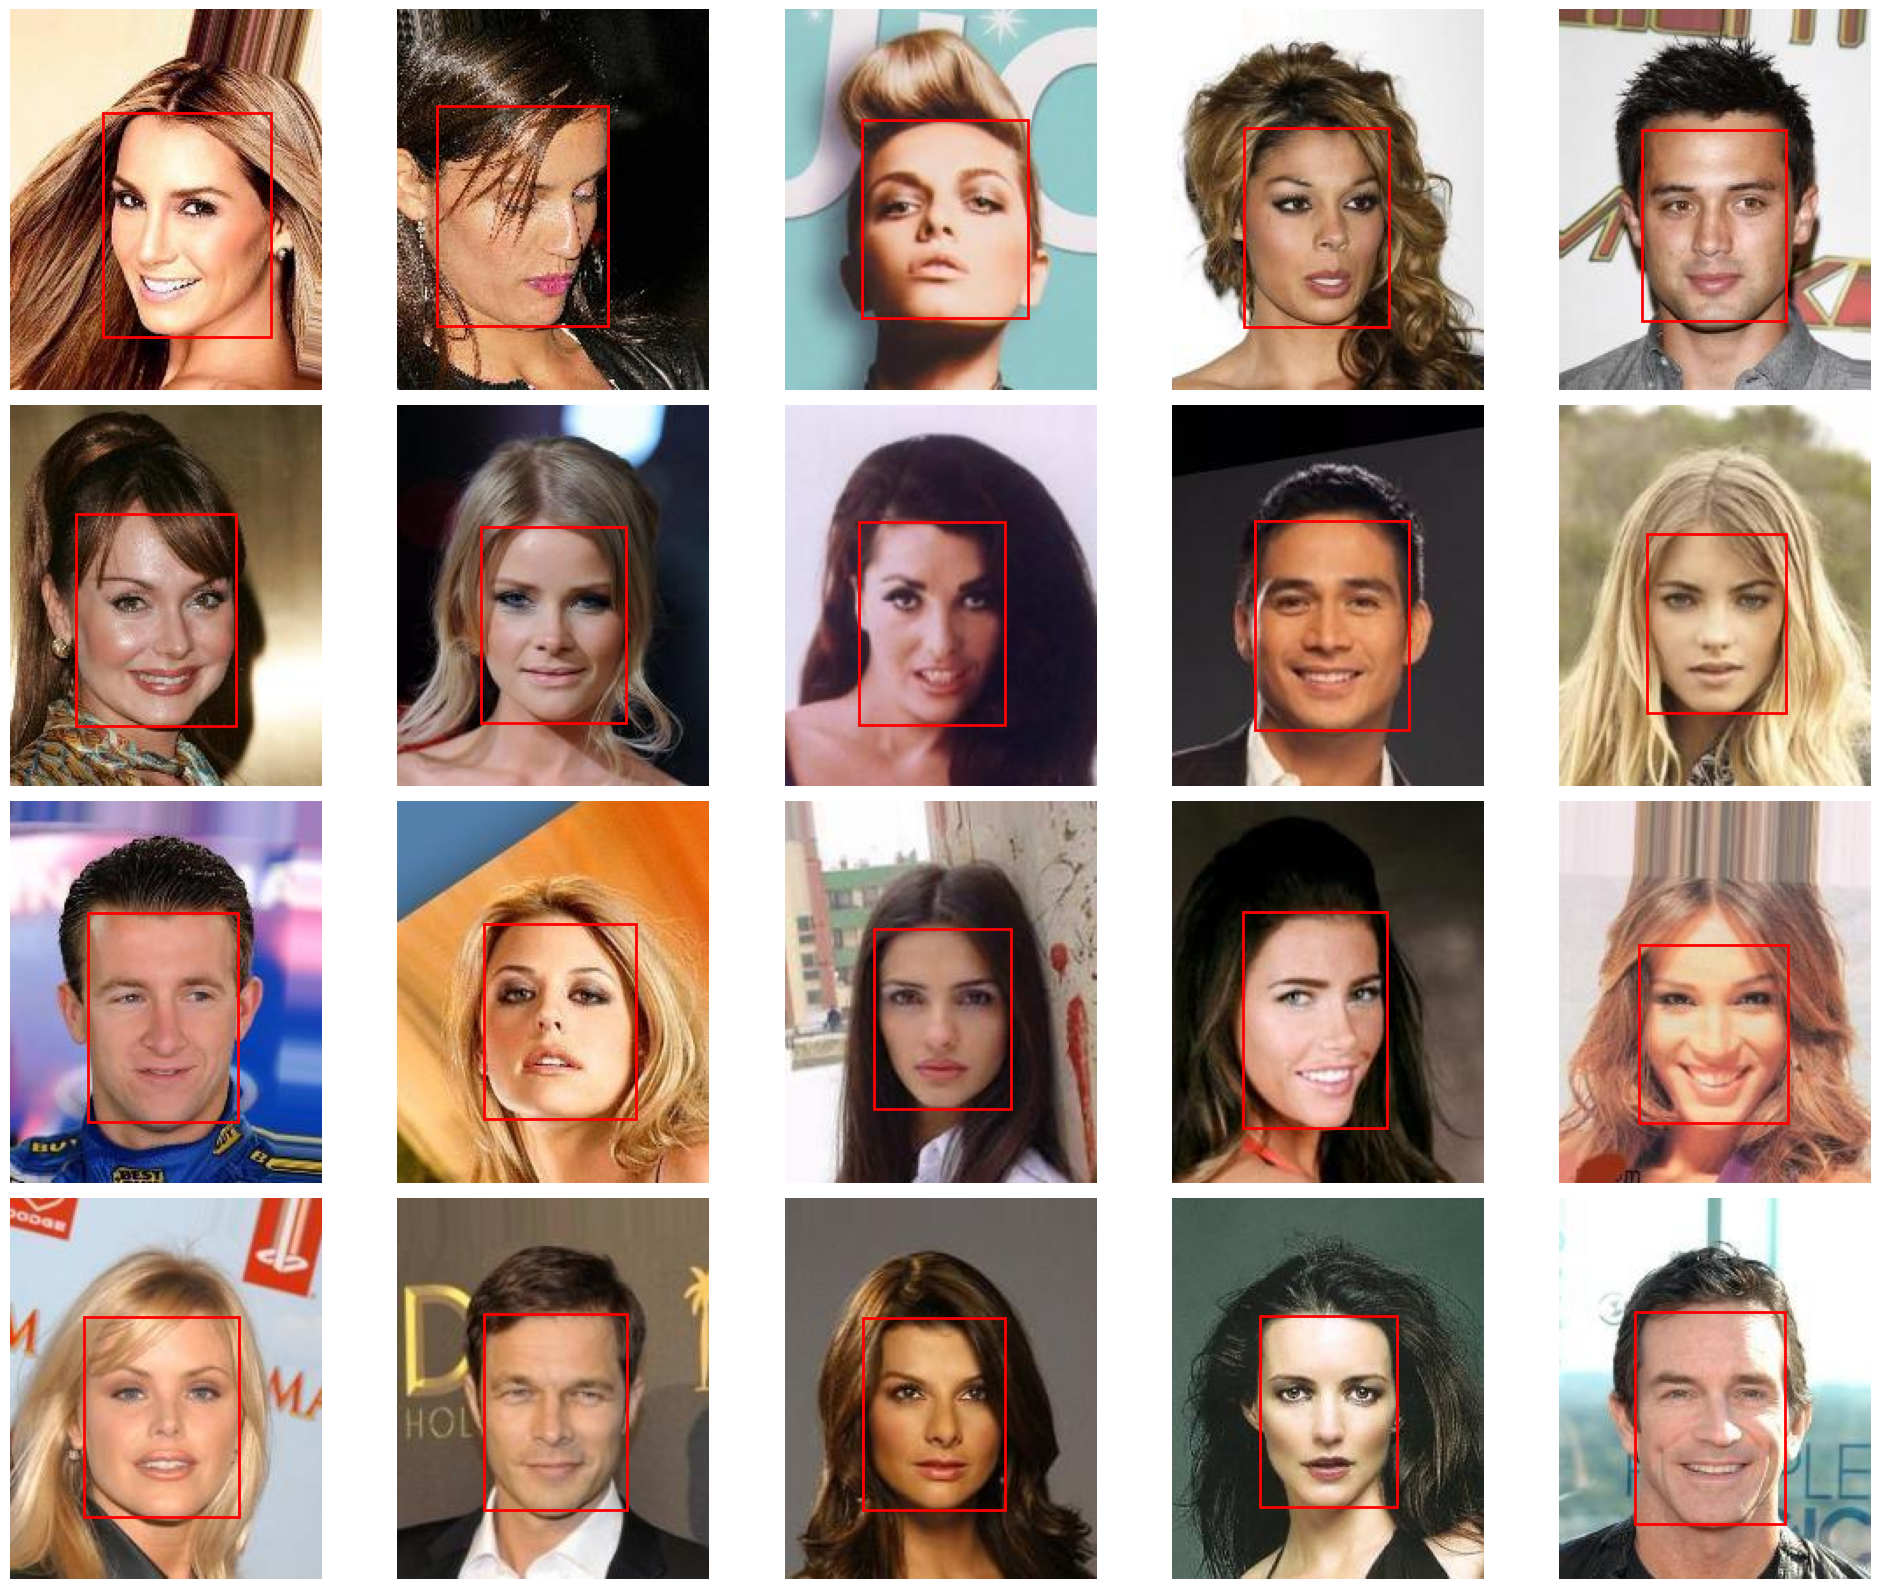

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Load the bounding box data
df = pd.read_csv('bounding_boxes.csv')

# Path to the directory containing images
image_dir = 'celeba_imgs'

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # Grid of 4x5 for 20 images
axs = axs.flatten()  # Flatten the array of axes for easier iteration

# Process each image
for idx, ax in enumerate(axs):
    if idx < len(df):
        row = df.iloc[idx]
        file_path = os.path.join(image_dir, row['filename'])
        image = Image.open(file_path)
        ax.imshow(image)
        # Create a rectangle patch with the bounding box dimensions
        rect = patches.Rectangle((row['x1'], row['y1']), row['x2'] - row['x1'], row['y2'] - row['y1'], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.axis('off')  # Turn off axis
    else:
        ax.axis('off')  # Turn off axis if there are no more images to display

plt.tight_layout()
plt.show()


In [4]:
# Calculate the widths and heights of the bounding boxes
df['width'] = df['x2'] - df['x1']
df['height'] = df['y2'] - df['y1']

# Calculate statistics for width and height
width_stats = df['width'].describe()
height_stats = df['height'].describe()

# Print the statistics
print("Width Statistics:\n", width_stats)
print("\nHeight Statistics:\n", height_stats)

Width Statistics:
 count    4907.000000
mean       85.150332
std         5.219126
min        62.265900
25%        81.662411
50%        84.863449
75%        88.345730
max       120.860882
Name: width, dtype: float64

Height Statistics:
 count    4907.000000
mean      115.379702
std         7.705261
min        81.730049
25%       110.354225
50%       115.056122
75%       120.377892
max       163.607807
Name: height, dtype: float64


In [10]:
# Load the bounding box data
df = pd.read_csv('bounding_boxes.csv')

# Define new width and height
new_width = 84
new_height = 92

# Calculate the center points of the original bounding boxes
df['center_x'] = (df['x1'] + df['x2']) / 2
df['center_y'] = (df['y1'] + df['y2']) / 2

# Adjust the vertical center by lowering it 10 pixels
df['adjusted_center_y'] = df['center_y'] + 10

# Calculate new x1, y1, x2, y2 based on the new dimensions and adjusted center points
df['norm_x1'] = df['center_x'] - new_width / 2
df['norm_y1'] = df['adjusted_center_y'] - new_height / 2
df['norm_x2'] = df['center_x'] + new_width / 2
df['norm_y2'] = df['adjusted_center_y'] + new_height / 2

# Create a new dataframe with the filename and normalized coordinates
norm_df = df[['filename', 'norm_x1', 'norm_y1', 'norm_x2', 'norm_y2']]
norm_df.columns = ['filename', 'x1', 'y1', 'x2', 'y2']  # Rename columns to match the original format

# Save the normalized bounding box data to a new CSV
norm_df.to_csv('norm_bounding_boxes.csv', index=False)

print("Normalized bounding box data saved to norm_bounding_boxes.csv")

Normalized bounding box data saved to norm_bounding_boxes.csv


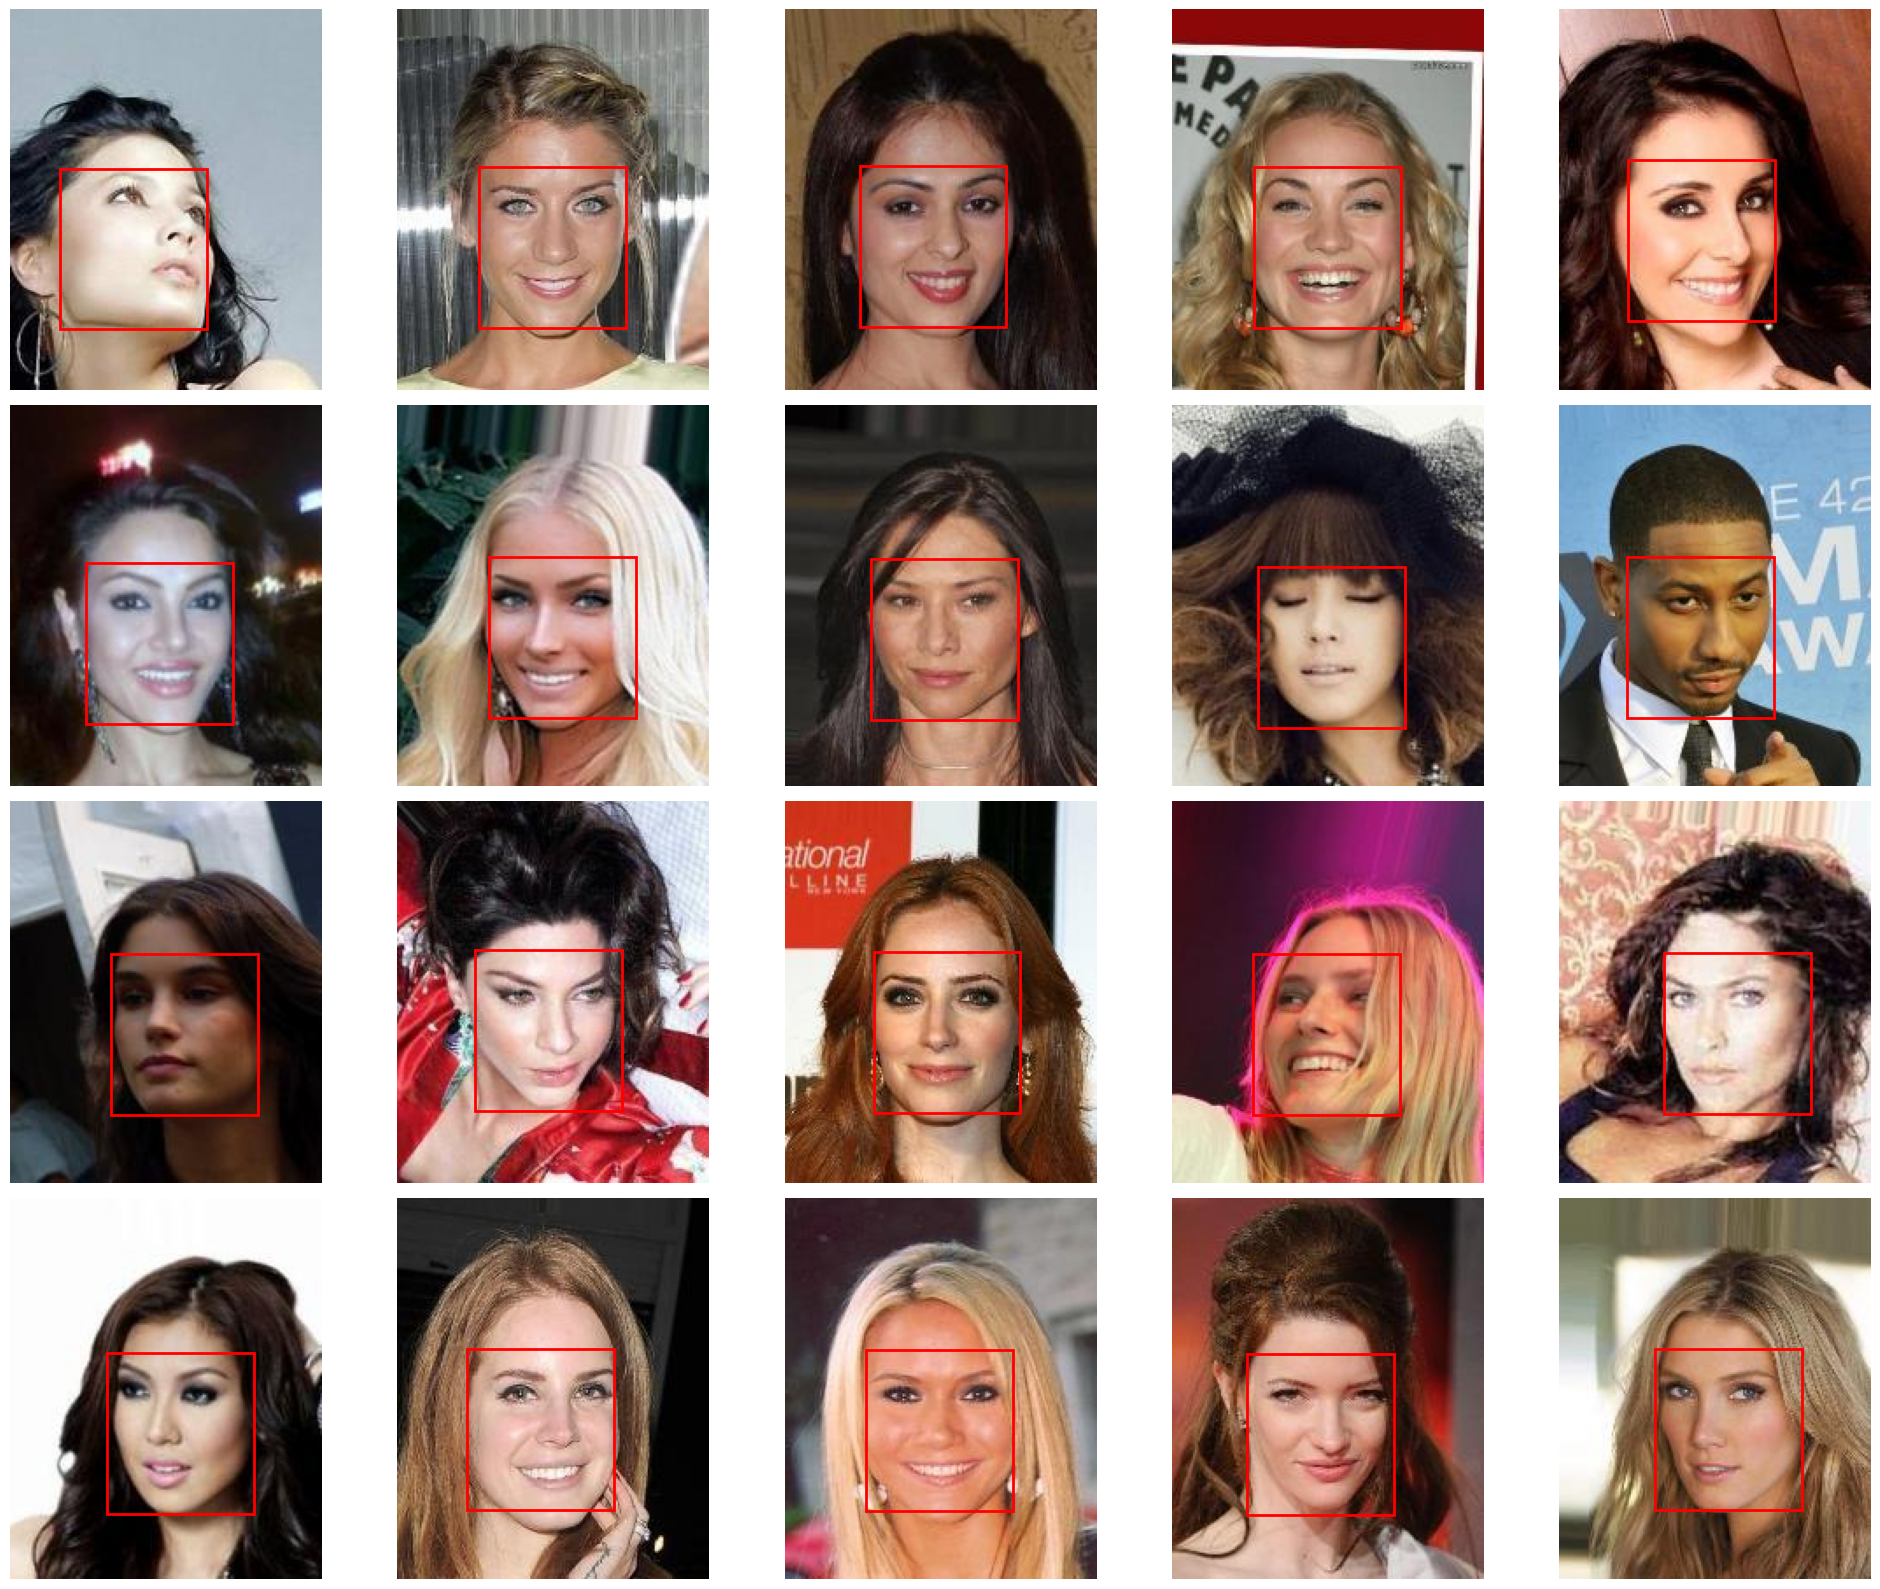

In [14]:
def plot_random_images_with_boxes(csv_path, image_dir='celeba/img_align_celeba', num_images=20):
    # Load the bounding box data
    df = pd.read_csv(csv_path)
    
    # Check if the dataset contains enough images
    if len(df) < num_images:
        print(f"Not enough images to sample {num_images}. Only {len(df)} available.")
        num_images = len(df)

    # Randomly sample num_images from the DataFrame
    sample_df = df.sample(n=num_images)
    
    # Set up the matplotlib figure and axes
    fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # Grid of 4x5 for 20 images
    axs = axs.flatten()  # Flatten the array of axes for easier iteration

    # Process each image in the sampled DataFrame
    for ax, (index, row) in zip(axs, sample_df.iterrows()):
        file_path = os.path.join(image_dir, row['filename'])
        image = Image.open(file_path)
        ax.imshow(image)
        # Create a rectangle patch with the bounding box dimensions
        rect = patches.Rectangle((row['x1'], row['y1']), row['x2'] - row['x1'], row['y2'] - row['y1'],
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

plot_random_images_with_boxes("norm_bounding_boxes.csv")